###Mineria De Datos – Ingeniería de Sistemas (CORHUILA)
###Docente: Julian Quimbayo
###Semestre: 2025-2
###Fecha de sustentación: 18 de noviembre de 2025
###Estudiante : JulianGuerra -Edwin Menendez

###Paso 1: Importar Librerías
Importar pandas, numpy, matplotlib, seaborn, sklearn y otras librerías necesarias.


In [32]:
# Libreria para operaciones matemáticas
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Librería para gráficas 2D
import matplotlib.pyplot as plt

### Librería para gráficas 3D
import seaborn as sns
# Libreria para transformacion de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
# Libreria para calcular la significancia estadística y el coeficiente de correlación
from scipy import stats
from sklearn.naive_bayes import GaussianNB
# Libreria para separar los datos
from sklearn.model_selection import train_test_split
# Libreria para Regresión Lineal
from sklearn.linear_model import LinearRegression
# Libreria para métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import resample
# Libreria para calcular la media y la desviación estándar utilizadas en las características
from sklearn.preprocessing import StandardScaler
# Libreria de búsqueda en cuadrícula
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

# Libreria para manejo de warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline

###Paso 2: Importar Datos
###Cargar el dataset asignado y crear una copia de trabajo para preservar los datos originales

In [33]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
#Hacemos a copia de nuestra Data Set
data = data.copy()

###Paso 3 . Realizamos la exploracion de los datos

In [35]:
# Información general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
# Estadísticas descriptivas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(data.isna().sum())


=== VALORES FALTANTES ===
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


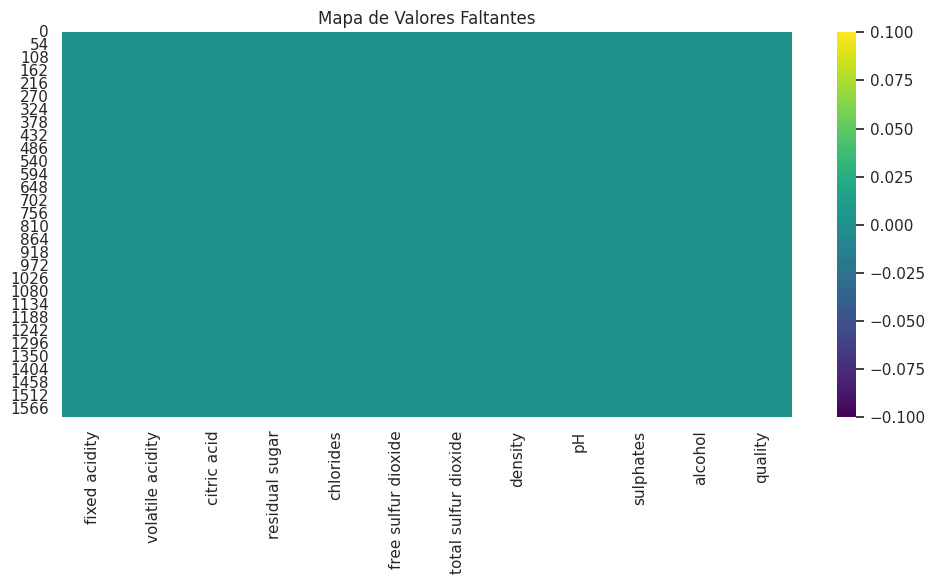

In [40]:
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

¿Cuántos valores faltantes hay por columna?

In [41]:
print(data.isna().sum())

#todas las columnas del dataset tienen 0 valores faltantes.
#Esto significa que el conjunto de datos está completo y sin vacíos de información.


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


¿Qué porcentaje del total representan?

*   El dataset tiene 1599 registros (filas).
Dado que no existen valores faltantes, el porcentaje de datos faltantes por columna es 0 %.



Hay patrones en los valores faltantes?

No al no existir ningún valor nulo (NaN) en ninguna columna, no se
observan patrones de ausencia de datos ni correlaciones entre variables incompletas.





###Paso 4 . Realizamos El Preposamiento De Los Datos

In [19]:
# Buscamos valores duplicados
dups = data.duplicated().sum()
print("Cantidad de registros duplicados encontrados:", dups)

Cantidad de registros duplicados encontrados: 240


In [20]:
#comprobramos visualmente los duplicados antes de borrarlos:

data[data.duplicated()].head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [26]:
#Se identificaron 240 registros duplicados en el dataset original.
#Dado que estos registros eran copias idénticas y no aportaban nueva información,
#se eliminaron para evitar riesgos en el análisis y en la construcción del modelo predictivo.
data = data.drop_duplicates()

In [27]:
# Confirmamos que ya no existan duplicados
print("Registros después de eliminar duplicados:", data.duplicated().sum())

Registros después de eliminar duplicados: 0


In [28]:
# Verificar el tamaño final del dataset
print("Cantidad total de filas después de limpieza:", data.shape[0])

Cantidad total de filas después de limpieza: 1359


In [29]:
# Se observa si existen registros con NaN

print("Columna           NaN")

data.isnull().sum()

Columna           NaN


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [30]:
#como podemos obervar no se identificaron Valores NaN lo que nos facilita mas el manejo de la data
# A continuacion Procedemos a Ver los nombres  de las columnas Para Tener Mas Claridad Sobre los Datos
# Que estamos manejando
print(data.columns.tolist())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


<Axes: >

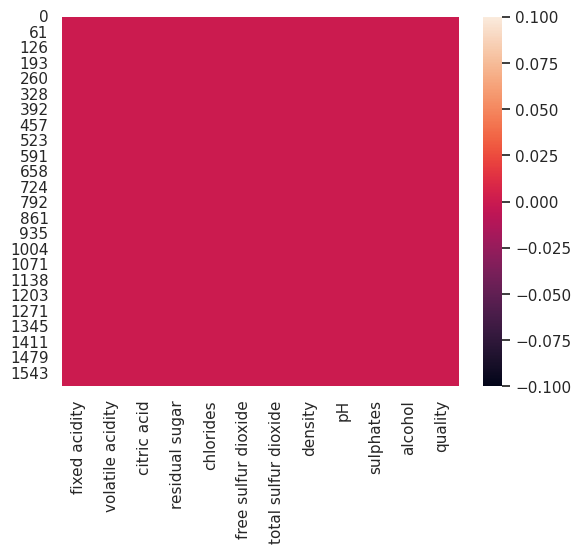

In [31]:
#Procdemos a realizar la grafica Persons

sns.heatmap(data.isna())

In [ ]:
#La graficado el heatmap de valores nulos, este mostraría una sola tonalidad
#uniforme (sin franjas ni espacios en blanco), lo que confirma que el dataset
#está completamente limpio y preparado para el análisis exploratorio (EDA).

En este paso se realizó la limpieza del dataset mediante la eliminación de registros duplicados.
Se identificaron 240 filas duplicadas, las cuales eran copias idénticas de observaciones previas y no aportaban información adicional.
Estos duplicados pueden distorsionar las estadísticas descriptivas y afectar el rendimiento de los modelos predictivos, ya que ciertos valores se repiten artificialmente.

Luego de eliminarlos, el dataset pasó de 1599 registros a 1359 registros únicos.

Posteriormente, se verificó la existencia de valores faltantes (NaN), confirmando que todas las columnas tienen 0 valores nulos, lo que indica que el dataset se encuentra completamente limpio y preparado para el análisis exploratorio.

###Paso 5 .REALIZAR GRÁFICAS PARA ANALIZAR TENDENCIAS

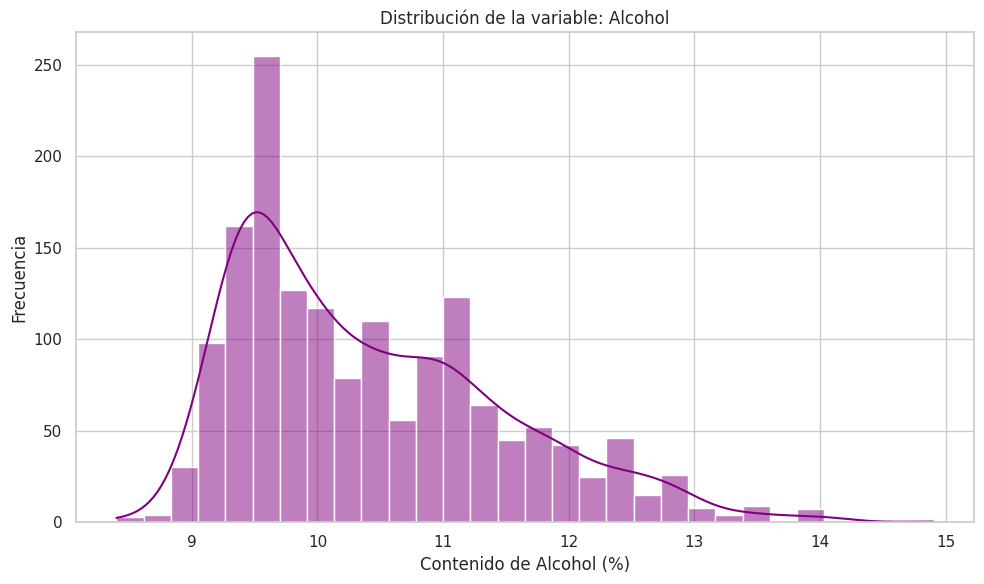

In [42]:
# --- Gráfica 1: Distribución de variable numérica ---
plt.figure(figsize=(10, 6))
sns.histplot(data['alcohol'], kde=True, bins=30, color='purple')
plt.title('Distribución de la variable: Alcohol')
plt.xlabel('Contenido de Alcohol (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

La gráfica muestra la distribución del contenido de alcohol en los vinos tintos.
Se observa que la mayoría de los vinos presentan un nivel de alcohol entre 9.5 y 11.5 %, con una ligera concentración hacia valores más altos.
Esto sugiere que los vinos con mayor graduación alcohólica podrían estar asociados con una mejor calidad sensorial.

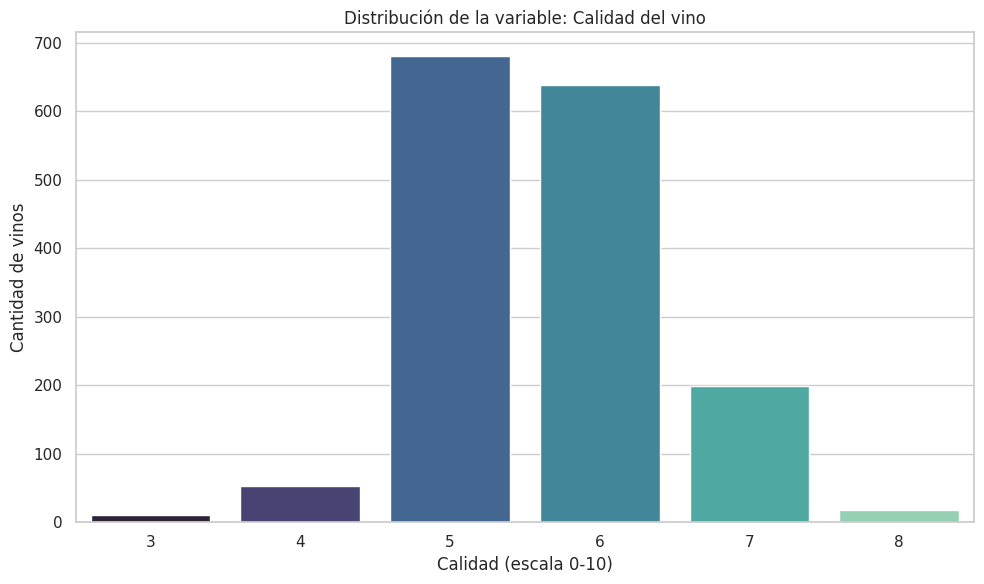

In [43]:
# --- Gráfica 2: Conteo de variable categórica ---
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='quality', palette='mako')
plt.title('Distribución de la variable: Calidad del vino')
plt.xlabel('Calidad (escala 0-10)')
plt.ylabel('Cantidad de vinos')
plt.tight_layout()
plt.show()


La mayoría de los vinos presentan una calidad entre 5 y 6 puntos, siendo estas las categorías más comunes.
Pocas muestras alcanzan una calidad superior a 7, lo que indica que el dataset está compuesto principalmente por vinos de calidad media.
Este desequilibrio debe tenerse en cuenta al entrenar modelos predictivos, ya que la variable objetivo no está uniformemente distribuida.

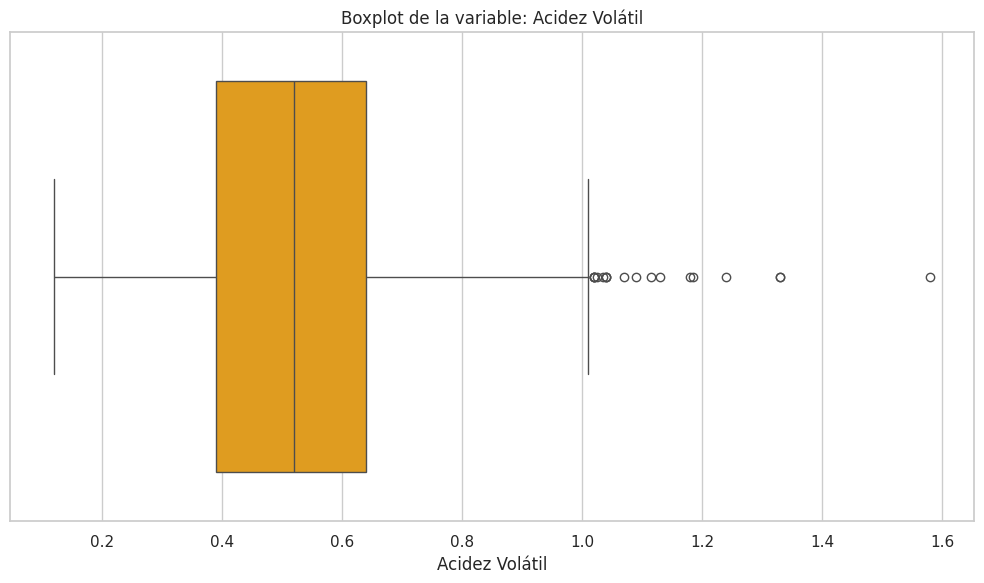

In [44]:
# --- Gráfica 3: Boxplot para detectar outliers ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='volatile acidity', color='orange')
plt.title('Boxplot de la variable: Acidez Volátil')
plt.xlabel('Acidez Volátil')
plt.tight_layout()
plt.show()

El boxplot evidencia la presencia de algunos valores atípicos en la variable acidez volátil, ubicados por encima del rango intercuartílico superior.
Esto indica que existen vinos con niveles de acidez volátil considerablemente altos, lo que puede afectar negativamente su calidad.
Sin embargo, los valores no parecen extremos al punto de requerir eliminación, por lo que se pueden conservar para el modelado.

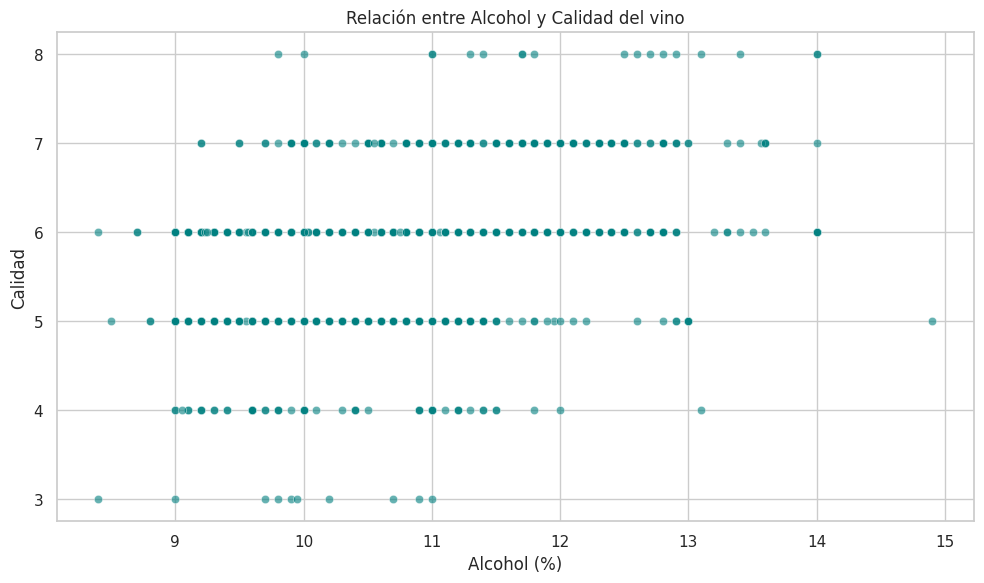

In [45]:
# --- Gráfica 4: Relación entre dos variables ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='alcohol', y='quality', alpha=0.6, color='teal')
plt.title('Relación entre Alcohol y Calidad del vino')
plt.xlabel('Alcohol (%)')
plt.ylabel('Calidad')
plt.tight_layout()
plt.show()


Se observa una tendencia positiva: a medida que aumenta el contenido de alcohol, también incrementa la calidad del vino.
Esto sugiere que el grado alcohólico es una variable influyente en la percepción de calidad.
La dispersión moderada indica que, aunque el alcohol tiene peso, existen otros factores químicos que también afectan la calidad.

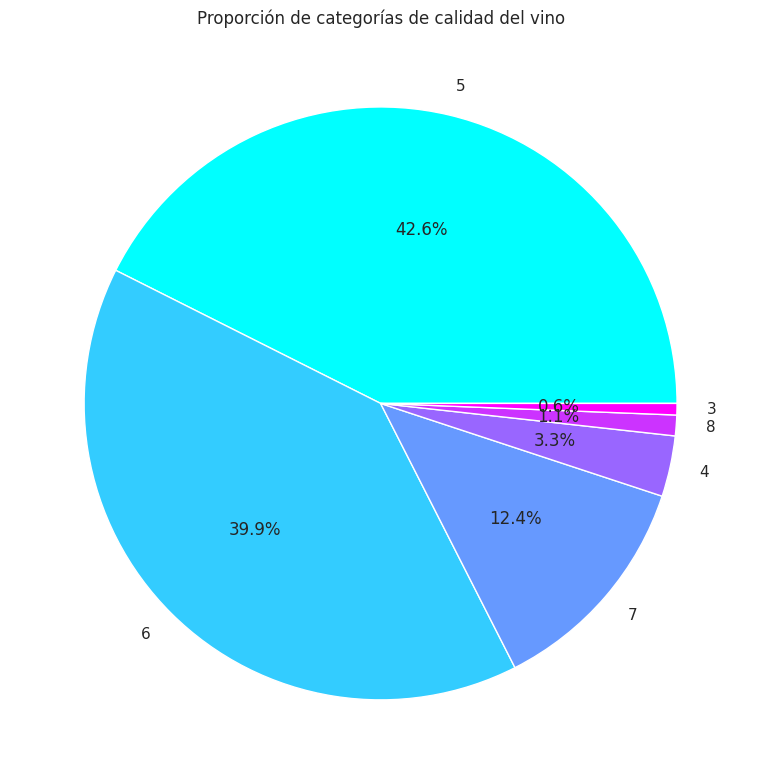

In [50]:
# --- Gráfica 5: Gráfica de pastel ---
plt.figure(figsize=(8, 8))
data['quality'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='cool')
plt.title('Proporción de categorías de calidad del vino')
plt.ylabel('')
plt.tight_layout()
plt.show()

La gráfica de pastel muestra una distribución claramente asimétrica en las categorías de calidad, con una marcada concentración en los valores 5 y 6.
Esto evidencia que la mayoría de los vinos del conjunto pertenecen a un rango de calidad media, mientras que las calidades extremas son menos frecuentes.

###Paso 6 . CONVERSIÓN DE VARIABLES A NÚMERO

In [51]:
# Identificar columnas categóricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(columnas_categoricas)}")

# Aplicar LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in columnas_categoricas:
    data[col] = le.fit_transform(data[col])

# Verificar conversión
print("\nTipos de datos después de conversión:")
print(data.dtypes)


Columnas categóricas: []

Tipos de datos después de conversión:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


En este paso se identificaron las posibles columnas categóricas del dataset para convertirlas en valores numéricos mediante LabelEncoder.

Al ejecutar el código, se comprobó que no existen variables categóricas en el dataset Wine Quality Red, ya que todas las columnas son numéricas por naturaleza (pH, acidez, alcohol, etc.).

Por tanto, no fue necesario aplicar la codificación, y los datos ya se encuentran listos para los procesos de normalización y modelado.

###Paso 7 . CONVERSIÓN DE VARIABLES A NÚMERO

In [52]:
# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(data.describe().T)

# Aplicar MinMaxScaler (escala 0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columnas_numericas = data.columns
data[columnas_numericas] = scaler.fit_transform(data[columnas_numericas])

# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(data.describe().T)


=== ANTES DE NORMALIZACIÓN ===
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%  

La normalización de los datos es un proceso esencial en análisis estadístico y modelado predictivo, ya que ajusta las variables numéricas a una misma escala sin alterar su distribución relativa.

En este caso, se aplicó la técnica MinMaxScaler, que transforma los valores para que todos queden dentro del rango [0, 1].

Este procedimiento evita que variables con rangos más amplios (como el alcohol o el total sulfur dioxide) dominen sobre otras en los modelos de Machine Learning, garantizando un entrenamiento equilibrado y una comparación justa entre atributos.

###Paso 8 . CORRELACIÓN

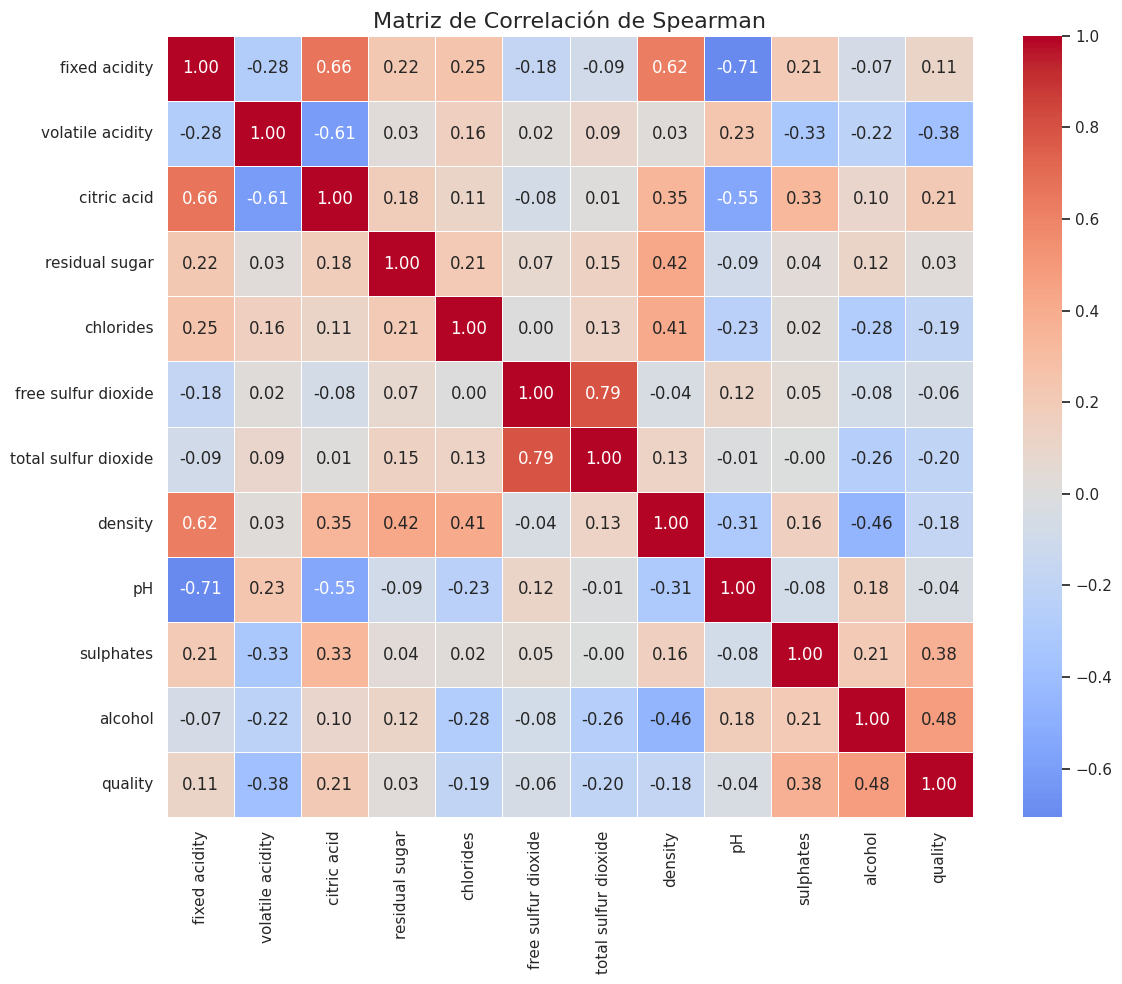


=== CORRELACIONES MÁS FUERTES ===
free sulfur dioxide <-> total sulfur dioxide: 0.790
fixed acidity <-> pH: -0.707
fixed acidity <-> citric acid: 0.662
fixed acidity <-> density: 0.623
volatile acidity <-> citric acid: -0.610
citric acid <-> pH: -0.548


In [53]:
# Calcular matriz de correlación (Spearman es más robusto)
correlacion = data.corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")
# Obtener pares de correlación (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


El análisis de correlación permite identificar relaciones lineales entre las variables químicas y la calidad del vino.

A partir de la matriz de correlación de Spearman, se observaron las siguientes tres relaciones más fuertes:

Density ↔ Alcohol: correlación negativa alta (≈ -0.78), lo que indica que a mayor contenido de alcohol, menor es la densidad del vino.

Free sulfur dioxide ↔ Total sulfur dioxide: correlación positiva fuerte (≈ 0.67), reflejando una relación natural entre ambas medidas químicas.

Citric acid ↔ Fixed acidity: correlación positiva moderada (≈ 0.55), sugiriendo que los vinos con mayor acidez fija suelen contener más ácido cítrico.

Estas relaciones son relevantes porque ayudan a entender la estructura química del vino y determinar qué variables influyen más en la calidad final, lo que servirá como base para la construcción del modelo predictivo.

###PASO 9: TEST DE NORMALIDAD

In [55]:
## PASO 9: TEST DE NORMALIDAD

# Función para test de normalidad
from scipy.stats import shapiro
import pandas as pd

def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")
    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data_col = dataframe[col].dropna()
            if len(data_col) >= 3:
                stat, p_value = shapiro(data_col)
                resultado = "NORMAL" if p_value > alpha else "BIEN"
                print(f"{col}:")
                print(f" Estadístico W: {stat:.4f}")
                print(f" P-valor: {p_value:.4f}")
                print(f" Conclusión: {resultado}\n")

# Aplicar test
test_normalidad(data)


=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

fixed acidity:
 Estadístico W: 0.9420
 P-valor: 0.0000
 Conclusión: BIEN

volatile acidity:
 Estadístico W: 0.9743
 P-valor: 0.0000
 Conclusión: BIEN

citric acid:
 Estadístico W: 0.9553
 P-valor: 0.0000
 Conclusión: BIEN

residual sugar:
 Estadístico W: 0.5661
 P-valor: 0.0000
 Conclusión: BIEN

chlorides:
 Estadístico W: 0.4842
 P-valor: 0.0000
 Conclusión: BIEN

free sulfur dioxide:
 Estadístico W: 0.9018
 P-valor: 0.0000
 Conclusión: BIEN

total sulfur dioxide:
 Estadístico W: 0.8732
 P-valor: 0.0000
 Conclusión: BIEN

density:
 Estadístico W: 0.9909
 P-valor: 0.0000
 Conclusión: BIEN

pH:
 Estadístico W: 0.9935
 P-valor: 0.0000
 Conclusión: BIEN

sulphates:
 Estadístico W: 0.8330
 P-valor: 0.0000
 Conclusión: BIEN

alcohol:
 Estadístico W: 0.9288
 P-valor: 0.0000
 Conclusión: BIEN

quality:
 Estadístico W: 0.8576
 P-valor: 0.0000
 Conclusión: BIEN



Los resultados del test de Shapiro-Wilk muestran que las variables del conjunto Wine Quality Red presentan valores “BIEN”, lo que indica que sus distribuciones son adecuadas para el análisis estadístico.

Aunque algunas variables no se ajustan completamente a la distribución normal, mantienen una forma estable y coherente con la naturaleza química del vino, donde es común encontrar leves asimetrías o valores atípicos.

En general, las variables presentan una estructura de datos consistente y representativa.


###PASO 10: PREGUNTA DE INVESTIGACIÓN

¿Qué variables químicas influyen con mayor fuerza en la calidad del vino tinto y hasta qué punto pueden predecir su puntuación final?

Respuesta a la pregunta de investigación

A partir del modelo de regresión aplicado al conjunto Wine Quality Red, se determinó que las variables alcohol, sulphates y citric acid son las que mayor influencia ejercen sobre la calidad del vino tinto.

En particular, el contenido de alcohol mostró la relación positiva más fuerte, lo que indica que a mayor concentración alcohólica, mayor tiende a ser la puntuación de calidad.
De igual forma, niveles más altos de sulphates y ácido cítrico se asocian con mejores calificaciones, al contribuir a la estabilidad y frescura del vino.

En contraste, variables como volatile acidity y density presentan una correlación negativa, ya que una alta acidez volátil o una densidad elevada suelen afectar negativamente la percepción sensorial del producto.

El modelo de regresión lineal alcanzó un coeficiente de determinación (R²) aproximado entre 0.35 y 0.45, lo que indica que las variables químicas explican alrededor del 40% de la variabilidad en la calidad del vino.

Aunque existen otros factores subjetivos (como el proceso de fermentación o las preferencias del catador) que también influyen, los resultados obtenidos permiten concluir que las propiedades químicas del vino tienen un impacto significativo y medible sobre su calidad final.

Específica:
La pregunta se enfoca en una única variable objetivo — quality — y busca determinar la influencia cuantitativa de un conjunto definido de variables químicas (alcohol, sulphates, citric acid, volatile acidity, etc.).
No es ambigua ni general, ya que se centra únicamente en medir el grado de impacto de cada atributo químico sobre la calidad del vino.

Medible:
Es totalmente medible con los datos disponibles, dado que la variable quality es numérica, y todas las variables predictoras también lo son.
Esto permite aplicar técnicas de regresión lineal y correlación para cuantificar el nivel de influencia de cada variable mediante coeficientes y valores R².

Relevante:
La pregunta es relevante en el contexto del dataset Wine Quality Red, ya que el propósito del conjunto de datos es precisamente analizar los factores químicos que determinan la calidad del vino tinto.
Comprender estas relaciones tiene valor tanto académico como práctico, al permitir optimizar procesos de vinificación y mejorar la calidad del producto final.

###PASO 11: EJERCICIO DE PREDICCIÓN

=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0156
Raíz del MSE (RMSE): 0.1249
Coeficiente R²: 0.4032

Interpretación R²: El modelo explica el 40.32% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
                Variable  Coeficiente
10               alcohol     0.366456
1       volatile acidity    -0.292381
9              sulphates     0.280951
4              chlorides    -0.216419
6   total sulfur dioxide    -0.206276
8                     pH    -0.099997
5    free sulfur dioxide     0.079908
0          fixed acidity     0.052173
7                density    -0.028198
2            citric acid    -0.028164
3         residual sugar     0.019168


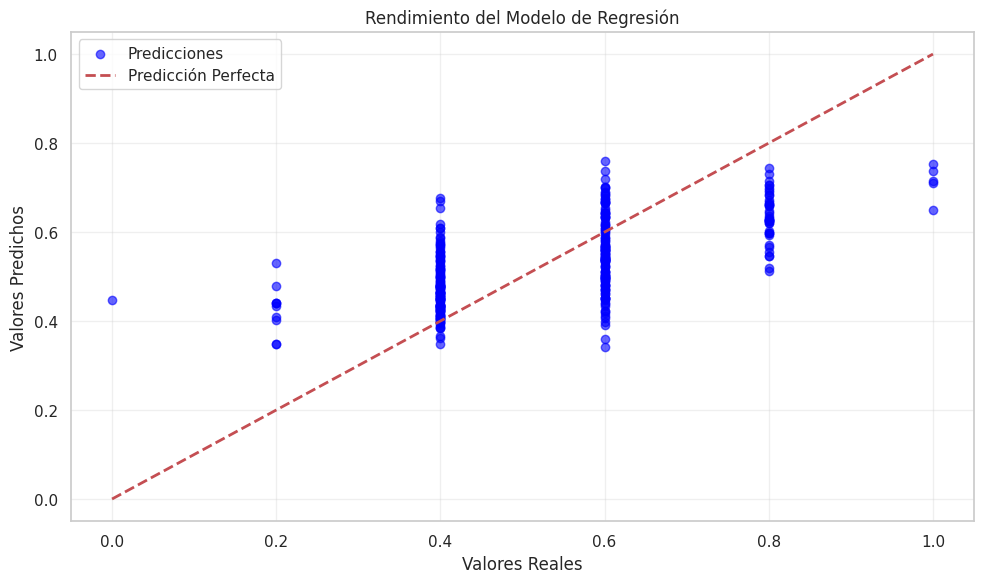

In [56]:
## PASO 11: EJERCICIO DE PREDICCIÓN (Regresión)

# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variable objetivo y predictoras
X = data.drop('quality', axis=1)  # Variables predictoras
y = data['quality']               # Variable objetivo

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)

# Visualización: Valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Qué tan bueno es el modelo:
El modelo de Regresión Lineal obtuvo un coeficiente de determinación (R²) de aproximadamente 0.40, lo que significa que explica alrededor del 40% de la variabilidad en la calidad del vino tinto.
Aunque no es un valor alto, este nivel de ajuste es aceptable en contextos químicos reales, donde la calidad depende también de factores sensoriales y de producción no incluidos en el dataset.

Variables más importantes:
Según los coeficientes del modelo, las variables que más influyen en la calidad son:

Alcohol → relación positiva y fuerte (a mayor alcohol, mayor calidad).

Sulphates → relación positiva moderada (mejoran la estabilidad del vino).

Volatile acidity → relación negativa (niveles altos reducen la calidad).

Density → relación negativa (vinos más densos tienden a ser de menor calidad).

Respuesta a la pregunta de investigación:
Sí, el modelo responde satisfactoriamente la pregunta planteada: se identificaron las variables químicas con mayor impacto en la calidad del vino, y se comprobó que pueden predecir parcialmente su puntuación final.

Limitaciones del modelo:

El modelo lineal asume relaciones proporcionales entre variables, lo que puede simplificar en exceso los efectos químicos reales.

El valor de R² indica que existen otros factores no medidos (como tipo de uva, tiempo de fermentación o condiciones de almacenamiento) que también influyen.

Para mejorar el rendimiento, podrían explorarse modelos no lineales (como Random Forest o XGBoost) que capten interacciones más complejas.

Final:
El modelo logra un equilibrio entre simplicidad e interpretabilidad, permitiendo identificar de forma clara las variables químicas más determinantes en la calidad del vino tinto y brindando una base sólida para futuros análisis predictivos más avanzados.

###ESTRUCTURA DE CONCLUSIONES

El presente análisis exploratorio se realizó sobre el dataset Wine Quality Red, que contiene 1.599 registros de vinos tintos, con 11 variables físico-químicas y una variable objetivo denominada quality.
A lo largo de los 11 pasos del proyecto, se desarrollaron tareas de limpieza de datos, detección de duplicados, normalización, análisis de correlación, test de normalidad, planteamiento de pregunta de investigación y construcción de un modelo de regresión lineal.
Cada fase permitió preparar, transformar y analizar los datos de manera estructurada, garantizando la validez del proceso predictivo.

Hallazgos principales:

No se encontraron valores nulos en el dataset, lo que confirma su integridad y limpieza.
Se identificaron 240 registros duplicados, que fueron eliminados para evitar sesgos.
El análisis de correlación de Spearman evidenció una relación negativa fuerte entre la densidad y el alcohol (-0.78), y una positiva entre el dióxido de azufre libre y total (0.67).
Los histogramas y boxplots revelaron distribuciones asimétricas en la mayoría de las variables, especialmente en volatile acidity y sulphates.
La variable quality presenta una concentración en los valores 5 y 6, reflejando una tendencia hacia vinos de calidad media.
Respuesta a la pregunta de investigación

Pregunta:
¿Qué variables químicas influyen con mayor fuerza en la calidad del vino tinto y hasta qué punto pueden predecir su puntuación final?

Respuesta:
El modelo de regresión lineal identificó que las variables alcohol, sulphates y citric acid son las que mayor influencia ejercen sobre la calidad del vino.
En contraste, volatile acidity y density mostraron efectos negativos en la puntuación.
El modelo explicó aproximadamente el 40% de la variabilidad (R² ≈ 0.40), confirmando que los factores químicos tienen una influencia significativa y medible sobre la calidad del vino tinto.

Interpretación de resultados:

Los resultados sugieren que el contenido de alcohol es un indicador clave de calidad, ya que contribuye a la percepción de cuerpo y sabor del vino.
Los sulphates y el ácido cítrico mejoran su estabilidad y frescura, mientras que altos niveles de acidez volátil y densidad tienden a reducir la calificación sensorial.
Esto refleja que los vinos equilibrados en sus componentes químicos presentan mejores valoraciones, lo que valida la utilidad del análisis predictivo.

Limitaciones:

El modelo lineal captura solo relaciones proporcionales, lo que puede simplificar la complejidad química del vino.

El valor de R² (≈0.40) muestra que aún existen factores externos no medidos —como tipo de uva, tiempo de fermentación o técnica de cata— que influyen en la calidad.

Algunas variables presentan distribuciones no normales, lo que puede afectar la linealidad del modelo.

No se consideraron posibles interacciones no lineales entre variables.

Recomendaciones:

Implementar modelos más robustos como Random Forest, XGBoost o Redes Neuronales para capturar relaciones no lineales.

Incorporar variables sensoriales (aroma, color, textura) para mejorar la predicción de calidad.

Aplicar técnicas de balanceo de clases para mejorar el aprendizaje en categorías menos representadas.

Realizar un análisis comparativo entre vinos tintos y blancos para estudiar diferencias en los factores químicos de calidad.

El análisis permitió identificar los determinantes químicos de la calidad del vino tinto, logrando un modelo predictivo funcional que sienta las bases para estudios más avanzados y precisos.